In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


<h1 style='color:#E74C3C'> Analyzing Where Do People Drink? </h1>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>.  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. 

<h2 style='color:#EC7063'> 1.Import Data </h2>

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

In [4]:
df[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<h2 style='color:#EC7063'> 2. Data Wrangling </h2>

<p style="background-color:Tomato; color: white"><b>Question 1</b>:  Display the data types of each column using the attribute dtype.</p>

<h3 style='color:#F1948A'> 2.1 Correct Data Type </h3>

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<h3 style='color:#F1948A'> 2.2 Count Missing Value </h3>

In [6]:
df.isnull().any().any()

False

<h2 style='color:#EC7063'> 3. Descriptive Statistical Analysis </h2>

<h3 style='color:#F1948A'> 3.1 Categorical Variables </h3>

<p style="background-color:Tomato; color: white"><b>Question 2</b>:  Use the method <code>groupby</code> to get the number of wine servings per continent.</p>

In [7]:
wine_servings_per_continent = df[['wine_servings','continent']].groupby('continent').mean()
wine_servings_per_continent

,wine_servings
continent,
Africa,16.264151
Asia,9.068182
Europe,142.222222
North America,24.521739
Oceania,35.625000
South America,62.416667


<p style="background-color:Tomato; color: white"><b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent.</p>

In [8]:
beer_servings_for_each_continent = df[['beer_servings','continent']].groupby('continent').describe()
beer_servings_for_each_continent

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

<p style="background-color:Tomato; color: white"><b>Question  4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.</p>

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='continent', ylabel='beer_servings'>

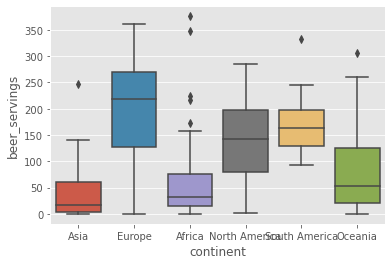

In [10]:
sns.boxplot(x=df['continent'], y=df['beer_servings'])

<h3 style='color:#F1948A'> 3.2 Continuous Numerical Variables </h3>

In [11]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<h4 style='color:#F5B7B1'> 3.2.1 Correlation </h4>

In [12]:
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [13]:
cols = df.corr().columns

In [14]:
from scipy import stats

pearson = []
p_val = []
for x in cols:
    pearson_coef, p_value = stats.pearsonr(df[x], df['total_litres_of_pure_alcohol'])
    pearson.append(pearson_coef)
    p_val.append(p_value)

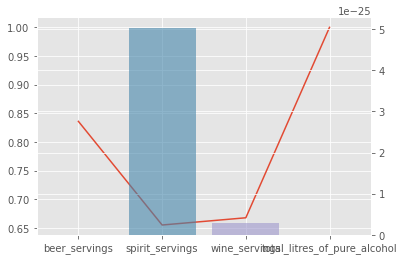

In [15]:
plt.plot(cols, pearson)

ax2 = plt.twinx()
g = sns.barplot(x=cols, y=p_val, alpha=0.6)
g.set(ylim=(0, None))

plt.show()

<h4 style='color:#F5B7B1'> 3.2.2 Regression Plot </h4>

In [16]:
import seaborn as sns

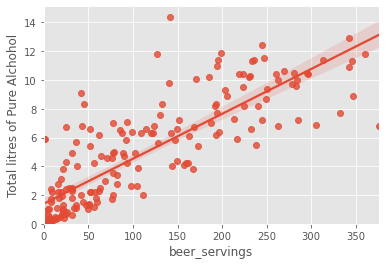

In [17]:
sns.regplot(x=df['beer_servings'], y=df['total_litres_of_pure_alcohol'])
plt.ylim(0,)
plt.ylabel('Total litres of Pure Alchohol')
plt.show()

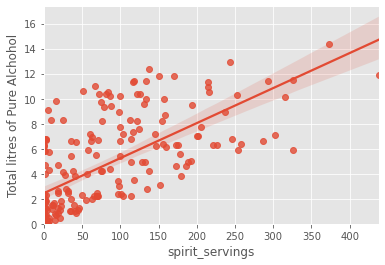

In [18]:
sns.regplot(x=df['spirit_servings'], y=df['total_litres_of_pure_alcohol'])
plt.ylim(0,)
plt.ylabel('Total litres of Pure Alchohol')
plt.show()

<p style="background-color:Tomato; color: white"><b>Question  5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.</p>

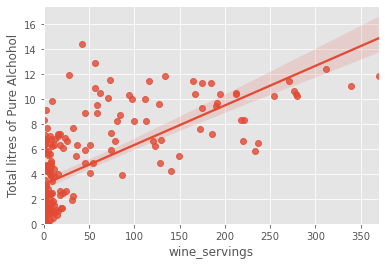

In [19]:
sns.regplot(x=df['wine_servings'], y=df['total_litres_of_pure_alcohol'])
plt.ylim(0,)
plt.ylabel('Total litres of Pure Alchohol')
plt.show()

<h2 style='color:#EC7063'> 4. Model Development, Evaluation, Refinement </h2>

<h3 style='color:#F1948A'> 4.1 Single predictor variable: <code> wine_servings </code> </h3>

<p style="background-color:Tomato; color: white"><b>Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$.</p>

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
y = df['total_litres_of_pure_alcohol']
X = df[cols].drop(['total_litres_of_pure_alcohol'], axis=1)
lm = LinearRegression()
X_wine = X[['wine_servings']]
lm.fit(X_wine,y)
yhat_wine = lm.predict(X_wine)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


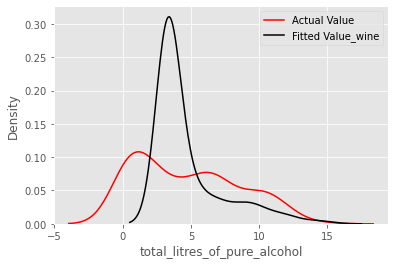

In [22]:
ax1 = sns.distplot(df['total_litres_of_pure_alcohol'], hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(yhat_wine, hist=False, color="k", label="Fitted Value_wine", ax=ax1)
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, yhat_wine)
print('The R-square value is: ', r_squared)

The R-square value is:  0.4456875459787605


In [24]:
from sklearn.metrics import mean_squared_error
mse_wine = mean_squared_error(df['total_litres_of_pure_alcohol'], yhat_wine)
print('The MSE value is: ', mse_wine)

The MSE value is:  7.851286122663144


<h3 style='color:#F1948A'> 4.2 Multiple predictor variable: <code> wine_servings, 'spirit_servings', 'beer_servings' </code> </h3>

<p style="background-color:Tomato; color: white"><b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code.</p>

<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = df['total_litres_of_pure_alcohol']
X = df[cols].drop(['total_litres_of_pure_alcohol'], axis=1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)
LR1 = LinearRegression()
LR1.fit(x_train, y_train)
yhat_all = LR1.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


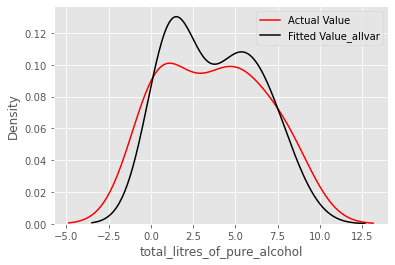

In [28]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(yhat_all, hist=False, color="k", label="Fitted Value_allvar", ax=ax1)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import r2_score
r_squared_all = r2_score(y_test, yhat_all)
print('The R-square value is: ', r_squared_all)

The R-square value is:  0.6990304512837944


In [30]:
from sklearn.metrics import mean_squared_error
mse_all = mean_squared_error(y_test, yhat_all)
print('The MSE value is: ', mse_all)

The MSE value is:  2.48765628067508


<p style="background-color:Tomato; color: white"><b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data.There are some hints in the notebook: 

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

<p style="background-color:Tomato; color: white">The second element in the tuple contains the model constructor </p>

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [32]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
ypipe = pipe.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


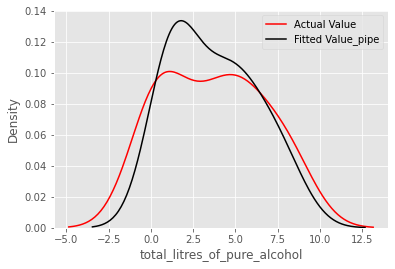

In [33]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(ypipe, hist=False, color="k", label="Fitted Value_pipe", ax=ax1)
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score
r_squared_pipe = r2_score(y_test, ypipe)
print('The R-square value is: ', r_squared_pipe)

The R-square value is:  0.7076376133886035


In [35]:
from sklearn.metrics import mean_squared_error
mse_pipe = mean_squared_error(y_test, ypipe)
print('The MSE value is: ', mse_pipe)

The MSE value is:  2.4165139974768324


<p style="background-color:Tomato; color: white"><b>Question  9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data.

In [36]:
from sklearn.linear_model import Ridge
RidgeRegression = Ridge(alpha = 0.1)
RidgeRegression.fit(x_train, y_train)
yhat_r01 = RidgeRegression.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


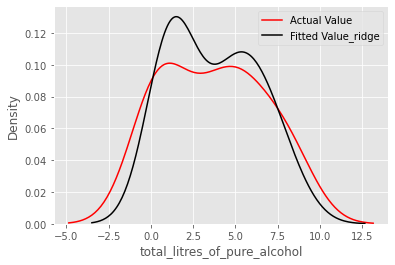

In [37]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(yhat_r01, hist=False, color="k", label="Fitted Value_ridge", ax=ax1)
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import r2_score
r_squared_r01 = r2_score(y_test, yhat_r01)
print('The R-square value is: ', r_squared_r01)

The R-square value is:  0.699030454901918


In [39]:
from sklearn.metrics import mean_squared_error
mse_r01 = mean_squared_error(y_test, yhat_r01)
print('The MSE value is: ', mse_r01)

The MSE value is:  2.48765625076957


<p style="background-color:Tomato; color: white"><b>Question   10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. 

In [40]:
PR = PolynomialFeatures(degree= 2)
x_train_pr = PR.fit_transform(x_train)
x_test_pr = PR.fit_transform(x_test)

In [41]:
RidgeRegression = Ridge(alpha=0.1)
RidgeRegression.fit(x_train_pr, y_train)
yhat_pr = RidgeRegression.predict(x_test_pr)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


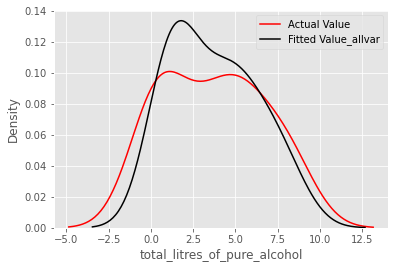

In [42]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(yhat_pr, hist=False, color="k", label="Fitted Value_allvar", ax=ax1)
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import r2_score
r_squared_pr = r2_score(y_test, yhat_pr)
print('The R-square value is: ', r_squared_pr)

The R-square value is:  0.7076376228095799


In [44]:
from sklearn.metrics import mean_squared_error
mse_pr = mean_squared_error(y_test, yhat_pr)
print('The MSE value is: ', mse_pr)

The MSE value is:  2.4165139196079872


In [47]:
print(r_squared_all, mse_all) 
print(r_squared_pipe, mse_pipe) 
print(r_squared_r01, mse_r01)
print(r_squared_pr, mse_pr)

0.6990304512837944 2.48765628067508
0.7076376133886035 2.4165139974768324
0.699030454901918 2.48765625076957
0.7076376228095799 2.4165139196079872


<h4 style='color:#943126'>Comparison</h4>
<b>MSE</b>: MSE of the model combining <b> polynomial & ridge regression </b> is the smallest among all at 2.4165139196079872. <br>
<b>$R^2$</b>: $R^2$ of polynomial regression model is the largest among all at 0.7076376228095799. <br

In [111]:
df['total_litres_of_pure_alcohol'].describe()

count    193.000000
mean       4.717098
std        3.773298
min        0.000000
25%        1.300000
50%        4.200000
75%        7.200000
max       14.400000
Name: total_litres_of_pure_alcohol, dtype: float64